# Aequitas ToolKit

In [20]:
import pandas as pd
import seaborn as sns
!pip install git+https://github.com/dssg/aequitas.git
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
from aequitas import plot
# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

  Cloning https://github.com/dssg/aequitas.git to /tmp/pip-req-build-kofbznwy
  Running command git clone -q https://github.com/dssg/aequitas.git /tmp/pip-req-build-kofbznwy
  Created wheel for aequitas: filename=aequitas-0.41.0-cp37-none-any.whl size=2215381 sha256=8eff21755a1ce57d09f7011c1d207ab1a7acefed13e289d133bb6d81bf17028c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6e1nxlyi/wheels/b5/99/c1/0eee2071985ad9be9b6f4098ab64d3ab4fb11d5647a7b923a7
Successfully built aequitas


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/compas_for_aequitas.csv')
df.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


In [38]:
aq_palette = sns.diverging_palette(225, 35, n=2)

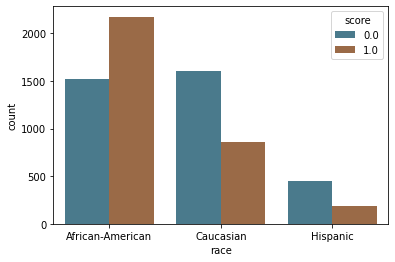

In [39]:
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

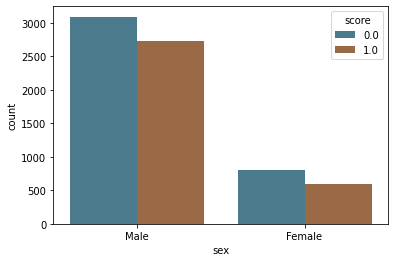

In [40]:
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

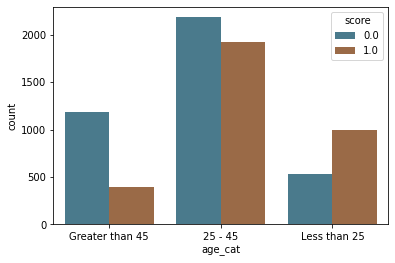

In [41]:
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

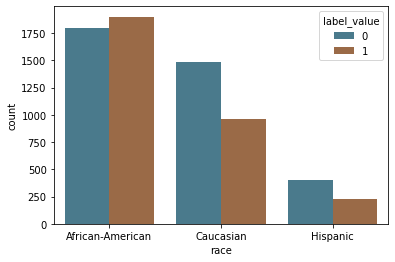

In [42]:
label_by_race = sns.countplot(x="race", hue="label_value", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

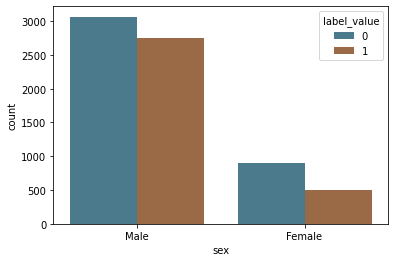

In [43]:
label_by_age = sns.countplot(x="sex", hue="label_value", data=df, palette=aq_palette)

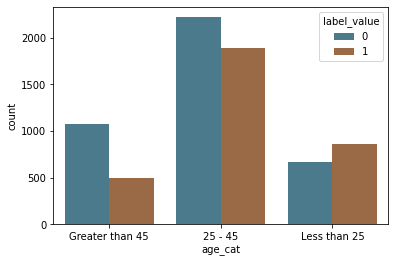

In [44]:
label_by_sex = sns.countplot(x="age_cat", hue="label_value", data=df, palette=aq_palette)

In [45]:
g = Group()
xtab, _ = g.get_crosstabs(df)
absolute_metrics = g.list_absolute_metrics(xtab)
b = Bias()
majority_bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={"race": "Caucasian", "sex": "Male", "age_cat": "25 - 45"}) 

get_disparity_predefined_group()


In [46]:
METRICS = ["fpr", "fdr", "tpr"]
ATTRIBUTE = "race"

In [47]:
plot.summary(majority_bdf, attributes_list=["race", "sex", "age_cat"], metrics_list=METRICS)

alt.VConcatChart(...)

In [48]:
plot.disparity(majority_bdf, METRICS, ATTRIBUTE)

alt.LayerChart(...)

In [49]:
plot.absolute(majority_bdf, METRICS, ATTRIBUTE)

alt.LayerChart(...)

In [50]:
plot.disparity_absolute(majority_bdf, METRICS, ATTRIBUTE)

alt.HConcatChart(...)

# Extra Credit

In [51]:
data_labels = ["id", "state", "stop_date", "stop_time", "location_raw", "county_name", 
               "county_fips", "fine_grained_location", "police_department", 
               "driver_gender", "driver_age_raw", "driver_age", "driver_race_raw", 
               "driver_race", "violation_raw", "violation", "search_conducted", 
               "search_type_raw", "search_type", "contraband_found", "stop_outcome", 
               "is_arrested", "search_basis", "officer_id", "drugs_related_stop", 
               "ethnicity", "district"]

data_url = '/content/drive/My Drive/Colab Notebooks/data/NC_cleaned_10K.csv'

original = pd.read_csv(data_url, names=data_labels, engine='c', na_values="?", error_bad_lines=False)

In [ ]:
new = original[['driver_race', 'driver_gender', 'driver_age', 'search_conducted', 
                'stop_outcome', 'is_arrested']] # remove driver age if cannot fix pre-processing

df = new.rename(columns={'stop_outcome': 'score'})

df.head()



In [ ]:
#citation = df['stop_outcome'].replace('Citation', 0).replace('No Action', 1).replace('Written Warning', 1).replace('Verbal Warning', 1).replace('Arrest', 1)
df.head()

In [ ]:
g = Group()
xtab, _ = g.get_crosstabs(df)
absolute_metrics = g.list_absolute_metrics(xtab)
b = Bias()
majority_bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={"driver_race": "White", "driver_gender": "M", "driver_age": "25 - 45"})  #fix driver age??